In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from datacleaner import autoclean
import klib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

Data Loading and Initial Exploration

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\ML_Lectures2\Tweets.csv")

In [5]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [3]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Data Preprocessing

In [4]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [6]:
threshold = 60
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns_to_drop, inplace=True, axis=1)


GridSpec(6, 6)

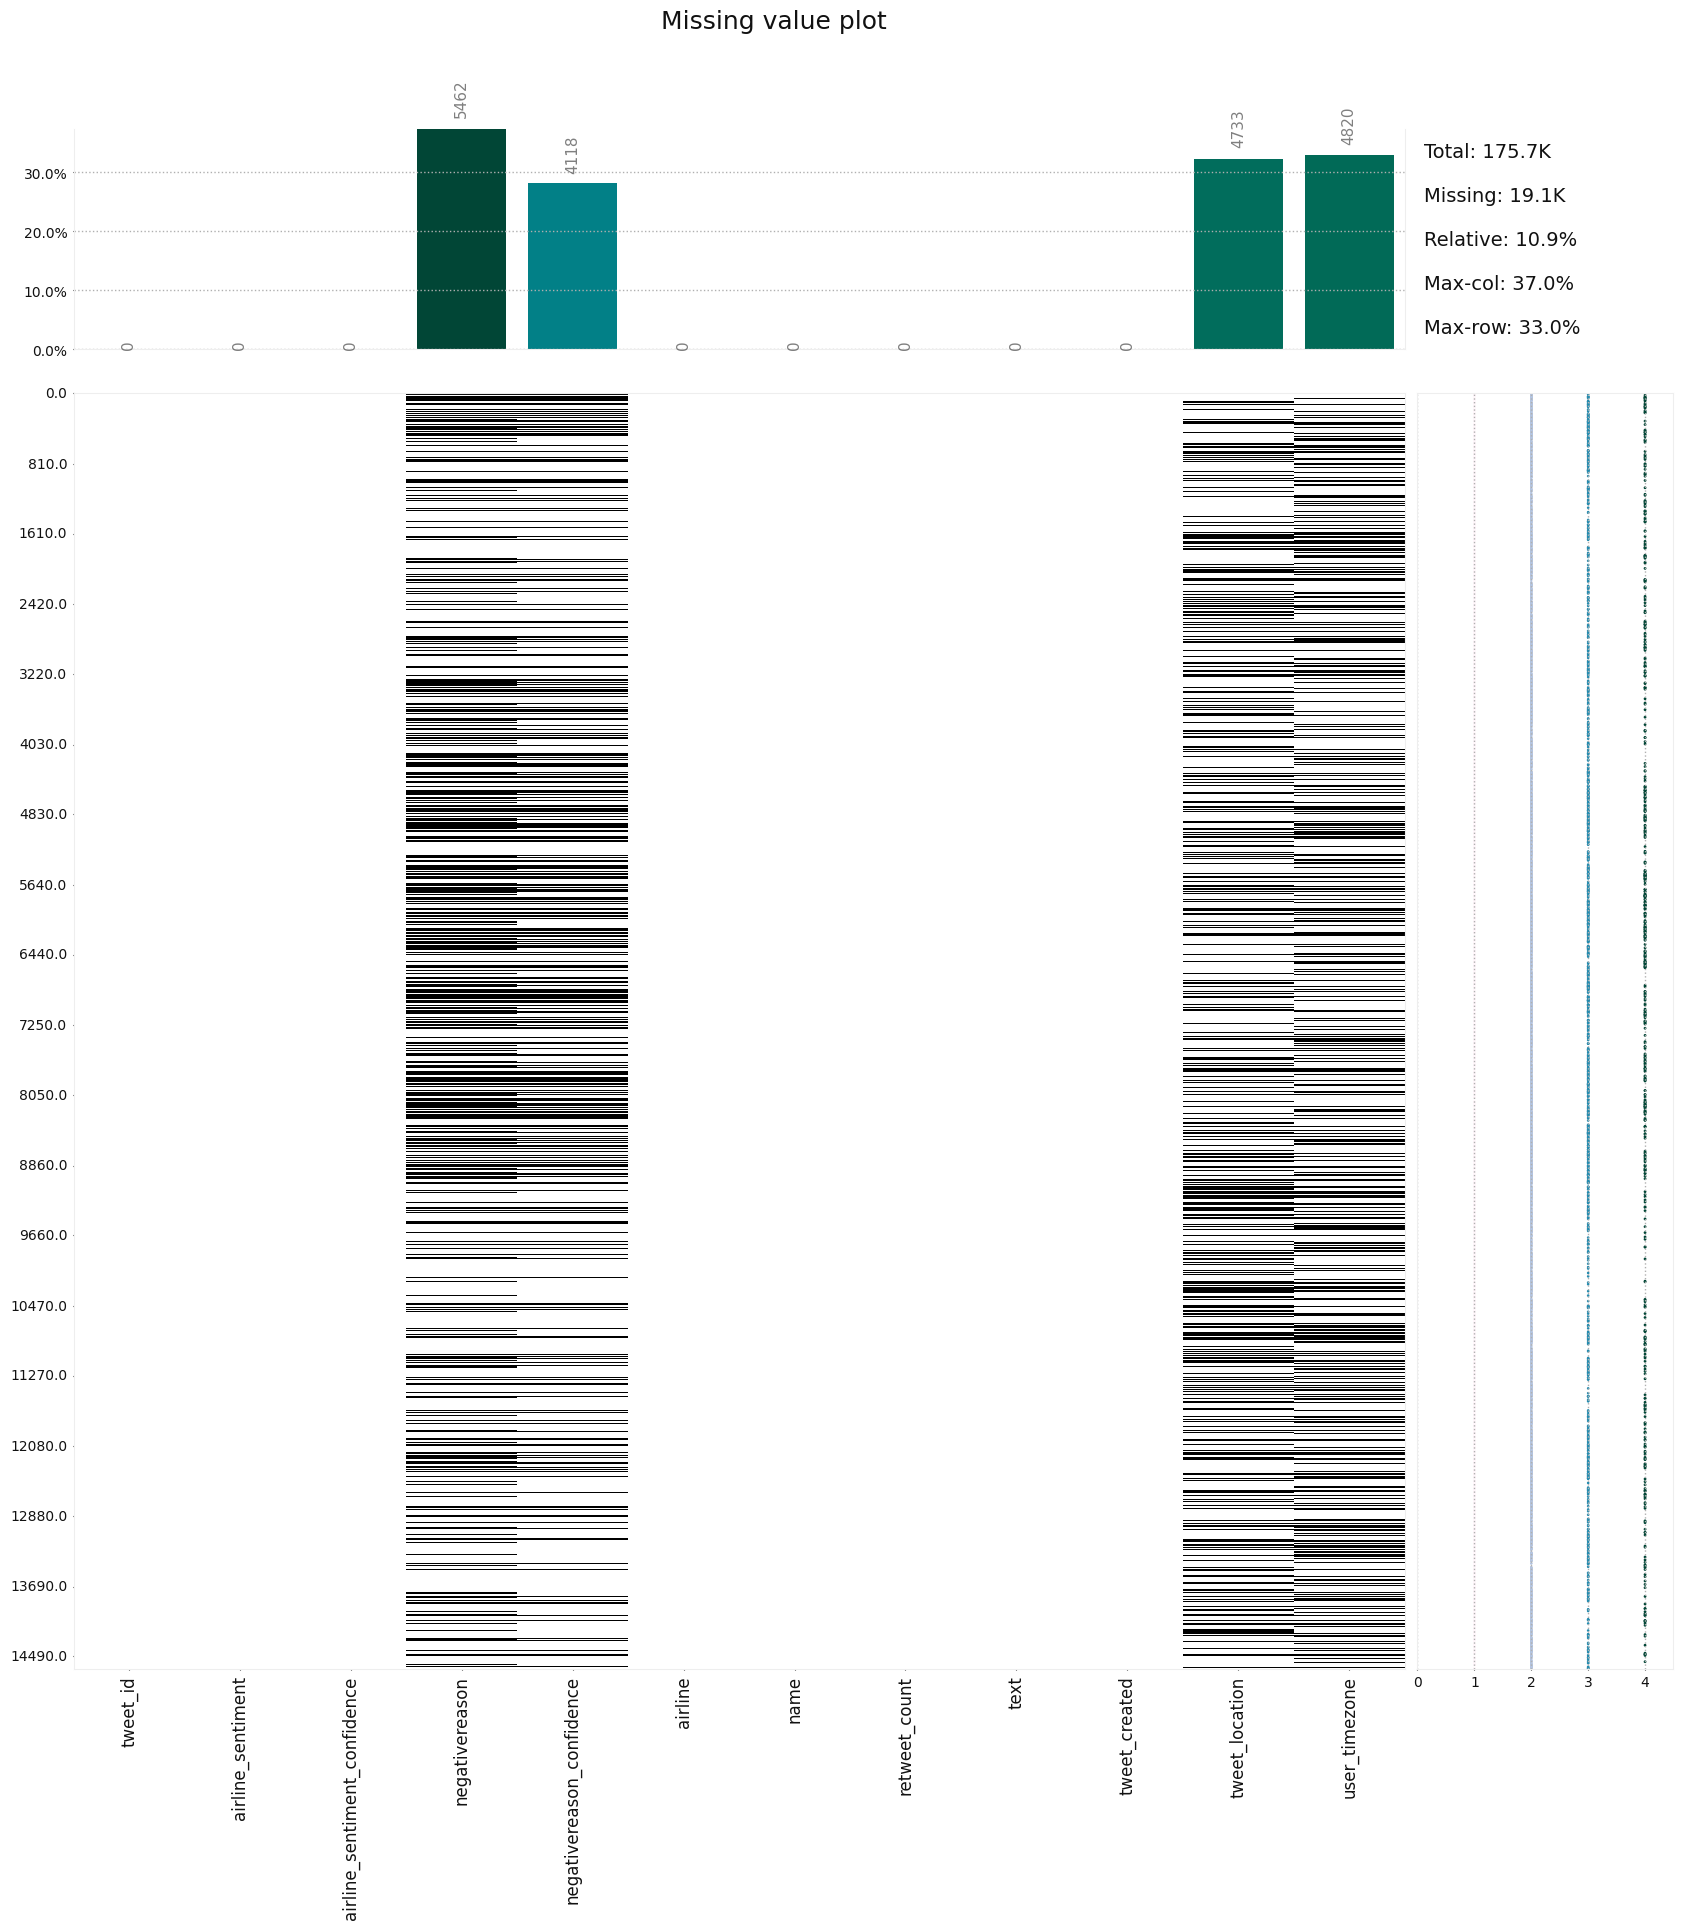

In [7]:
klib.missingval_plot(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='retweet_count', ylabel='Density'>

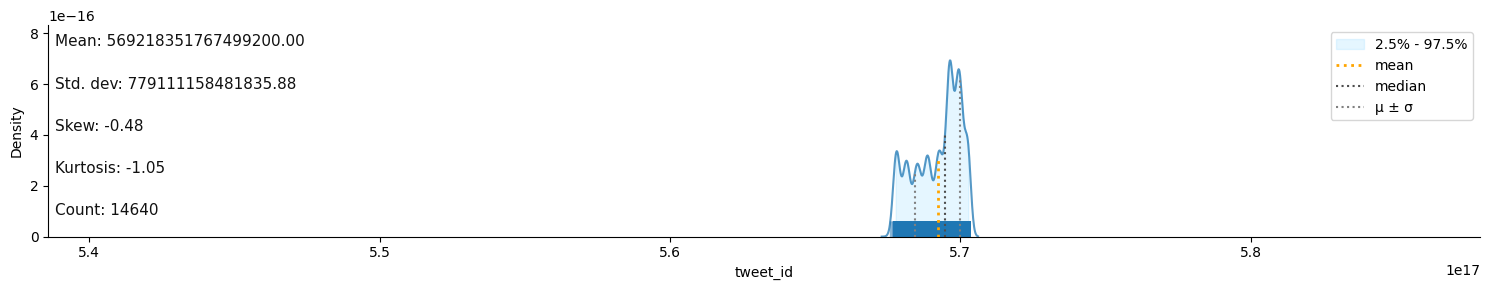

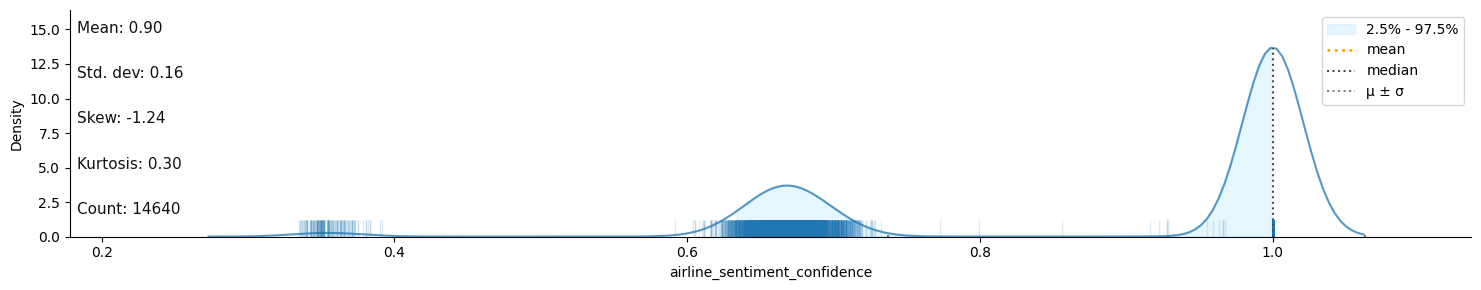

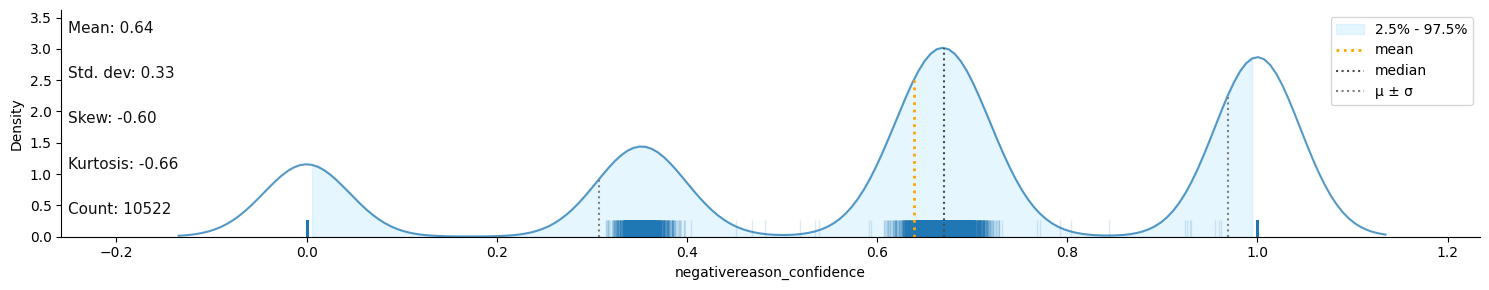

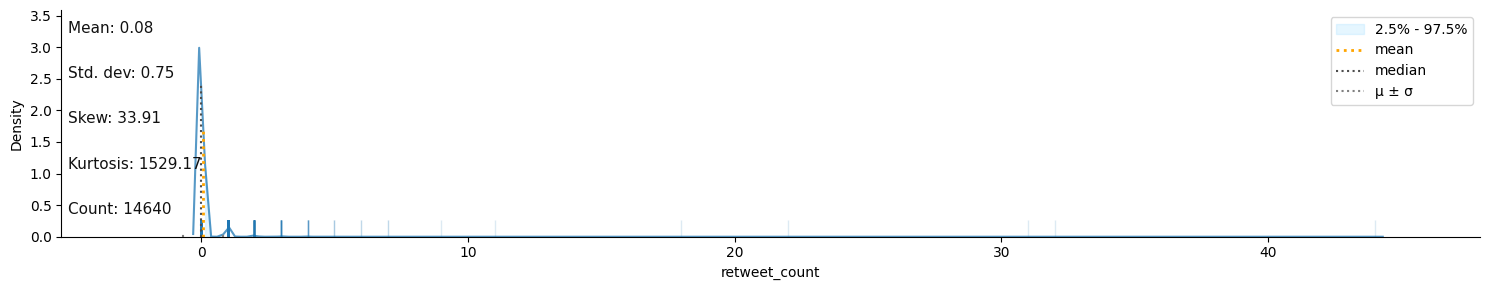

In [8]:
klib.dist_plot(df)

In [10]:
df = autoclean(df)
df = klib.data_cleaning(df) 

Shape of cleaned data: (14601, 12) - Remaining NAs: 0


Dropped rows: 39
     of which 39 duplicates. (Rows (first 150 shown): [12040, 12059, 12063, 12066, 12068, 12069, 12074, 12075, 12078, 12079, 12086, 12093, 12097, 12099, 12102, 12105, 12106, 12108, 12109, 12111, 12118, 12120, 12126, 12134, 12136, 12137, 12138, 12139, 12142, 12145, 12152, 12155, 12157, 12158, 12159, 12162, 12196, 13864, 14392])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.94 MB (-70.15%)



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14601 entries, 0 to 14600
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14601 non-null  int64  
 1   airline_sentiment             14601 non-null  int8   
 2   airline_sentiment_confidence  14601 non-null  float32
 3   negativereason                14601 non-null  int8   
 4   negativereason_confidence     14601 non-null  float32
 5   airline                       14601 non-null  int8   
 6   name                          14601 non-null  int16  
 7   retweet_count                 14601 non-null  int8   
 8   text                          14601 non-null  int16  
 9   tweet_created                 14601 non-null  int16  
 10  tweet_location                14601 non-null  int16  
 11  user_timezone                 14601 non-null  int8   
dtypes: float32(2), int16(4), int64(1), int8(5)
memory usage: 413

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col].fillna(df[col].mode()[0], inplace=True)
  else:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
     cardinality = df[col].nunique()
     if cardinality >= 5:
       le = LabelEncoder()
       df[col] = le.fit_transform(df[col])
     else:
      df[col] = pd.get_dummies(df, columns=[col], drop_first=True, dtype=int)

In [14]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,1,1.0000,3,0.6706,5,4049,0,10006,14211,353,31
1,570301130888122368,2,0.3486,3,0.0000,5,5395,0,10157,14169,353,62
2,570301083672813571,1,0.6837,3,0.6706,5,7678,0,9905,14168,1219,27


In [15]:
scaler = StandardScaler()
num_col = df.select_dtypes(include=np.number).columns
df[num_col] = scaler.fit_transform(df[num_col])

In [16]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,1.401297,0.616604,0.614248,-0.295648,0.084659,1.755075,0.082358,-0.110892,0.678069,1.695143,-0.876682,-0.264281
1,1.394869,1.939802,-3.383056,-0.295648,-2.305608,1.755075,0.682386,-0.110892,0.714186,1.684998,-0.876682,1.840291
2,1.394808,0.616604,-1.326721,-0.295648,0.084659,1.755075,1.700115,-0.110892,0.653911,1.684756,0.127809,-0.535839


Model selection

In [19]:
x = df.drop('airline_sentiment', axis=1)
y = df['airline_sentiment']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size= 0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [27]:
x_train.shape, x_test.shape, x_val.shape

((11680, 11), (1460, 11), (1461, 11))

In [29]:
y_train.shape, y_test.shape, y_val.shape

((11680,), (1460,), (1461,))

In [23]:
model = RandomForestRegressor()
rf_model = model.fit(x_train, y_train)

In [30]:
y_pred = rf_model.predict(x_test)

In [31]:
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

In [33]:
print(mse)
print(r2)

0.15280495390041446
0.8216019072875267


In [ ]:
# 1st result
# 0.15280495390041446
# 0.8216019072875267
